# Tarea 2.

Jorge Leonardo López Agredo, 2218061


**Tarea 2.** Existe un método para estimar una integral definida similar a regla de Simpson que llamaremos Regla Peculiar de Paul. Requiere que dividir el intervalo en un número de subintervalos divisible por cuatro. Entonces,
    $\int_a^bf(x)dx=\frac{2h}{9}\left[-f(a)-f(b)+16\sum_{k=0}^{n/4-1}f(x_{4k+1})-12\sum_{k=0}^{n/4-1}f(x_{4k+2})+16\sum_{k=0}^{n/4-1}f(x_{4k+3})-2\sum_{k=0}^{n/4-1}f(x_{4k})\right]$
    Escriba un programa corto que permita calcula la integral con esta aproximación usando $N$ subintervalos. Para la integral $I=\int_1^4xe^{-x^2}dx$ haga una tabla que compare los errores en la estimación de esta integral además con la regla de Simpson, la del Trapezoide y la de Riemann para una cantidad de $N=12(1,10,10^2,10^3,10^4,10^5,10^6)$. Establezca cual es el orden de error de cada aproximación. Haga un plot con sus resultados. Recuerde que la solución exacta para esta integral es $I=\int_1^4xe^{-x^2}dx=-\frac{1}{2}e^{-x^2}\Big|_1^4=0.18393966431813380117$. Haga la aproximación con 20 dígitos decimales.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from matplotlib import rcParams
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 26
rcParams['legend.fontsize']= 'x-large'
rcParams['axes.titlesize']= 'x-large'
rcParams['xtick.labelsize']= 'x-large'
rcParams['ytick.labelsize']= 'x-large'
rcParams['axes.labelsize']= 'x-large'
rcParams['figure.titlesize']= 'xx-large'
%matplotlib inline
#rcParams.keys()

In [4]:
def riemann_sum(f,a,b,N,method='midpoint'):
    '''Compute the Riemann sum of f(x) over the interval [a,b].
    
    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a , b : numbers
        Endpoints of the interval [a,b]
    N : integer
        Number of subintervals of equal length in the partition of [a,b]
    method : string
        Determines the kind of Riemann sum:
        right : Riemann sum using right endpoints
        left : Riemann sum using left endpoints
        midpoint (default) : Riemann sum using midpoints

    Returns
    -------
    float
        Approximation of the integral given by the Riemann sum.
    '''
    h = (b - a)/N
    x = np.linspace(a,b,N+1)

    if method == 'left':
        x_left = x[:-1]
        return np.sum(h*f(x_left))
    elif method == 'right':
        x_right = x[1:]
        return np.sum(h*f(x_right))
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:])/2
        return np.sum(h*f(x_mid))
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")
    return

In [5]:
def trapz(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

In [6]:
def simps(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by Simpson's rule.

    Simpson's rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/3) \sum_{k=1}^{N/2} (f(x_{2i-2} + 4f(x_{2i-1}) + f(x_{2i}))
    where x_i = a + i*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : (even) integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using
        Simpson's rule with N subintervals of equal length.

    Examples
    --------
    >>> simps(lambda x : 3*x**2,0,1,10)
    1.0
    '''
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

In [7]:
def PaulP(f,a,b,N=60):
    '''Approximate the integral of f(x) from a to b by Paul's Peculiar rule.

    Paul's Peculiar rule approximates the integral \int_a^b f(x) dx by the sum:
    $\int_a^bf(x)dx=\frac{2h}{9}\left[-f(a)-f(b)+16\sum_{k=0}^{n/4-1}f(x_{4k+1})
    -12\sum_{k=0}^{n/4-1}f(x_{4k+2})+16\sum_{k=0}^{n/4-1}f(x_{4k+3})
    -2\sum_{k=0}^{n/4-1}f(x_{4k})\right]$
    where x_i = a + i*h and h = (b - a)/N. 
    Addictionally, N must be a multiple of 4.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : (even) integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using
        Paul's Peculiar rule with N subintervals of equal length.

    Examples
    --------
    >>> PaulP(lambda x : 3*x**2,0,1,12)
    1.0
    '''
    if N % 4 != 0:
        raise ValueError("N must be an integer multiple of 4.")
    h = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = 2*h/9 *(-f(a)-f(b)+ 16* np.sum(y[1:-2:4])-12*np.sum(y[2:-1:4]) + 16*np.sum(y[3::4])-2*np.sum(y[0:-3:4]))
    return S

$\int_a^bf(x)dx=\frac{2h}{9}\left[-f(a)-f(b)+16\sum_{k=0}^{n/4-1}f(x_{4k+1})-12\sum_{k=0}^{n/4-1}f(x_{4k+2})+16\sum_{k=0}^{n/4-1}f(x_{4k+3})-2\sum_{k=0}^{n/4-1}f(x_{4k})\right]$

In [8]:
PaulP(lambda x : 3*x**2,0,1,12)


0.9999999999999997

Revisemos ahora la siguiente integral $I=\int_1^4xe^{-x^2}dx$, usando cada uno de los métodos estudiados y comparemos sus errores. Estudiando $N=12(1,10,10^2,10^3,10^4,10^5,10^6)$ y considerando que la solución exacta es $I=\int_1^4xe^{-x^2}dx=-\frac{1}{2}e^{-x^2}\Big|_1^4=0.18393966431813380117$

In [9]:
f = lambda x : x * np.e**(-x**2)

S,Rm,T,PPR,E, IntToPy=[],[],[],[],[], [],
for i in 12*np.logspace(0,6,7,dtype=int):
    a = 1; b = 4; N = i
    x = np.linspace(a,b,N+1)
    y = f(x)
    Exact=round(1/2*np.e**(-1)-1/2*np.e**(-16),20)
    Int_Python = spi.quad(f,a,b)[0]
    Num_trapz=trapz(f,a,b,i)
    Num_simps=simps(f,a,b,i)
    Num_Riemann = riemann_sum(f,a,b,i)
    Num_Paul = PaulP(f,a,b,i)
    E.append(Exact)
    S.append(Num_simps)
    Rm.append(Num_Riemann)
    T.append(Num_trapz)
    PPR.append(Num_Paul)
    IntToPy.append(Int_Python)
    

In [10]:
Todo=pd.DataFrame(np.array([12*np.logspace(0,6,7,dtype=int),E,Rm,S,T,PPR,IntToPy]).T,
                  columns=["N","Exact","Solution Riemann Midpoint","Solution Simps",
                           "Solution Trapz","Solution Paul's Peculiar Rule", "Integrate to Python"])
Todo

,N,Exact,Solution Riemann Midpoint,Solution Simps,Solution Trapz,Solution Paul's Peculiar Rule,Integrate to Python
0,12.0,0.18394,0.182964,0.183854,0.185876,0.145610,0.18394
1,120.0,0.18394,0.183930,0.183940,0.183959,0.179852,0.18394
2,1200.0,0.18394,0.183940,0.183940,0.183940,0.183531,0.18394
3,12000.0,0.18394,0.183940,0.183940,0.183940,0.183899,0.18394
4,120000.0,0.18394,0.183940,0.183940,0.183940,0.183936,0.18394
5,1200000.0,0.18394,0.183940,0.183940,0.183940,0.183939,0.18394
6,12000000.0,0.18394,0.183940,0.183940,0.183940,0.183940,0.18394


## Graficando los errores presentados al estudiar la integral dad usando La regla Peculiar de Paul.

In [13]:
Todo["Error in Solution PPR"] = abs(Todo["Solution Paul's Peculiar Rule"]-Todo["Exact"])/Todo["Exact"]
Todo

,N,Exact,Solution Riemann Midpoint,Solution Simps,Solution Trapz,Solution Paul's Peculiar Rule,Integrate to Python,Error in Solution PPR
0,12.0,0.18394,0.182964,0.183854,0.185876,0.145610,0.18394,2.083800e-01
1,120.0,0.18394,0.183930,0.183940,0.183959,0.179852,0.18394,2.222118e-02
2,1200.0,0.18394,0.183940,0.183940,0.183940,0.183531,0.18394,2.222223e-03
3,12000.0,0.18394,0.183940,0.183940,0.183940,0.183899,0.18394,2.222223e-04
4,120000.0,0.18394,0.183940,0.183940,0.183940,0.183936,0.18394,2.222223e-05
5,1200000.0,0.18394,0.183940,0.183940,0.183940,0.183939,0.18394,2.222223e-06
6,12000000.0,0.18394,0.183940,0.183940,0.183940,0.183940,0.18394,2.222223e-07


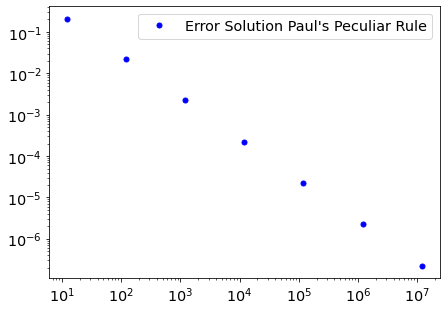

In [9]:
plt.figure(figsize=(7,5))
plt.loglog(Todo["N"],abs(Todo["Solution Paul's Peculiar Rule"]-Todo["Exact"])/Todo["Exact"],
           'b.',markersize=10,label="Error Solution Paul's Peculiar Rule")
plt.legend( loc = "best");

## Comparando ahora los errores presentados al usar cada uno de los métodos estudiados, tomando diferentes valores para N, tenemos:

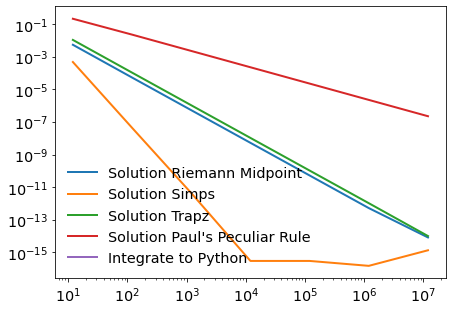

In [10]:
plt.figure(figsize=(7,5))
for i in ["Solution Riemann Midpoint","Solution Simps","Solution Trapz","Solution Paul's Peculiar Rule","Integrate to Python"]:
    plt.loglog(Todo["N"],abs(Todo[i]-Todo["Exact"])/Todo["Exact"],label=i)
    plt.legend(frameon = False, loc = "best")

In [12]:
np.sum(abs(Todo["Integrate to Python"]-Todo["Exact"])/Todo["Exact"])

0.0